# Situación problema (Parte 2)


**Instrucciones:** Considera las agrupaciones creadas en la Actividad 6: tratamiento de datos (parte 1) y con éstas
realizarás lo siguiente:


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import plotly.express as px
import scipy.stats as st
import seaborn as sb
from scipy.stats import shapiro, levene

In [9]:
def setup_data():
    # import data from csv file into a dataframe
    df = pd.read_csv('nutrition-facts-week15-normalized-transformed.csv')

    # get descriptive statistics
    print(df.describe())
    print(f"\n {df.dtypes}")
    display(df)

    return df
    
original_df = setup_data()

        Calories  Carbohydrates    Protein      Sodium
count  91.000000      91.000000  91.000000   91.000000
mean   51.382697       7.688705   3.230015  274.370879
std    12.339656       1.304327   0.659678  123.163569
min    22.075100       3.984000   1.313300    6.174900
25%    45.697400       7.210800   3.122000  191.064050
50%    48.054200       7.794800   3.162700  298.875100
75%    57.929250       8.369300   3.505550  347.257950
max    84.557700      12.723600   6.263600  553.037900

 Calories         float64
Carbohydrates    float64
Protein          float64
Sodium           float64
dtype: object


,Calories,Carbohydrates,Protein,Sodium
0,61.3375,8.0656,3.3210,298.8751
1,56.5156,8.2981,3.6967,281.2446
2,60.6808,8.1841,3.5115,243.7979
3,56.6705,8.8800,3.3953,253.2294
4,57.6466,7.6791,3.4996,343.9859
...,...,...,...,...
86,47.7728,7.9780,3.1220,182.8107
87,45.6974,7.2108,3.1427,314.2868
88,45.6974,7.2108,3.1427,314.2868
89,48.0542,8.1674,3.1220,186.8209


1. Dependiendo del número de grupos calóricos que hayas creado, estima los diferentes intervalos de confianza que se obtienen para la diferencia del promedio de calorías entre un grupo calórico y otro, al 97% de confianza.


In [10]:
def transform_criteria():
    global interval_low_1
    global interval_low_2
    global interval_average_1
    global interval_average_2
    global interval_high_1
    global interval_high_2

    # get from the prev homework
    best_lambda_cal = 0.47214917229854225

    # apply boxcox formula transformation to the criteria
    interval_low_1 = ((-1**best_lambda_cal - 1) / best_lambda_cal)
    interval_low_2 = ((2000**best_lambda_cal - 1) / best_lambda_cal)
    print("\nNew low criteria:", f"interval_low_1: {interval_low_1}", f"interval_low_2: {interval_low_2}", sep='\n')

    interval_average_1 = ((2000**best_lambda_cal - 1) / best_lambda_cal)
    interval_average_2 = ((2500**best_lambda_cal - 1) / best_lambda_cal)
    print("\nNew average criteria:", f"interval_average_1: {interval_average_1}", f"interval_average_2: {interval_average_2}", sep='\n')

    interval_high_1 = ((2500**best_lambda_cal - 1) / best_lambda_cal)
    interval_high_2 = ((4000**best_lambda_cal - 1) / best_lambda_cal)
    print("\nNew high criteria:", f"interval_high_1: {interval_high_1}", f"interval_high_2: {interval_high_2}", sep='\n')
    
transform_criteria()


New low criteria:
interval_low_1: -4.235949393416261
interval_low_2: 74.52976416158188

New average criteria:
interval_average_1: 74.52976416158188
interval_average_2: 83.04588384966141

New high criteria:
interval_high_1: 83.04588384966141
interval_high_2: 104.20580594964066


In [11]:
def filter_data(df):
    global df_cal_low
    global df_cal_average
    global df_cal_high

    df_cal_low = df[(df['Calories'] >= interval_low_1) & (df['Calories'] <= interval_low_2)]

    df_cal_average = df[(df['Calories'] >= interval_average_1) & (df['Calories'] <= interval_average_2)]

    df_cal_high = df[(df['Calories'] >= interval_high_1) & (df['Calories'] <= interval_high_2)]

    print("df_cal_low:")
    display(df_cal_low)
    print(df_cal_low.shape)
    print("df_cal_average:")
    display(df_cal_average)
    print(df_cal_average.shape)
    print("df_cal_high:")
    display(df_cal_high)
    print(df_cal_high.shape)

filter_data(original_df)

df_cal_low:


,Calories,Carbohydrates,Protein,Sodium
0,61.3375,8.0656,3.3210,298.8751
1,56.5156,8.2981,3.6967,281.2446
2,60.6808,8.1841,3.5115,243.7979
3,56.6705,8.8800,3.3953,253.2294
4,57.6466,7.6791,3.4996,343.9859
...,...,...,...,...
86,47.7728,7.9780,3.1220,182.8107
87,45.6974,7.2108,3.1427,314.2868
88,45.6974,7.2108,3.1427,314.2868
89,48.0542,8.1674,3.1220,186.8209


(87, 4)
df_cal_average:


,Calories,Carbohydrates,Protein,Sodium
13,76.5854,9.5714,4.0215,465.7321
20,74.8039,8.7024,4.0532,546.3756
21,80.5648,7.7948,4.1123,553.0379


(3, 4)
df_cal_high:


,Calories,Carbohydrates,Protein,Sodium
25,84.5577,10.6436,3.8264,351.769


(1, 4)


**Como ya verificaste y “corregiste” el supuesto de normalidad para cada una de las variables bajo estudio, ya puedes asumir que cada grupo calórico lo es.**


In [12]:
# just for check that the data is filtered correctly and normality distributed

def check_normality():
    phnorm_low_cal = shapiro(df_cal_low['Calories'])
    phnorm_cal_average = shapiro(df_cal_average['Calories'])
    phnorm_cal_high= shapiro(df_cal_high['Calories'])

    print(f"phnorm_low_cal: {phnorm_low_cal}", f"phnorm_high_cal: {phnorm_cal_average}", f"phnorm_high_cal: {phnorm_cal_high}", sep='\n')

    print(f"\nFor phnorm_low_cal 'P-value' is greater or equal than 'alpha': {phnorm_low_cal[1] > 0.03}", f"For phnorm_high_cal 'P-value' is greater or equal than 'alpha': {phnorm_cal_average[1] > 0.03}", f"For phnorm_high_cal 'P-value' is greater or equal than 'alpha': {phnorm_cal_high[1] > 0.03}", sep='\n')
check_normality()

ValueError: Data must be at least length 3.

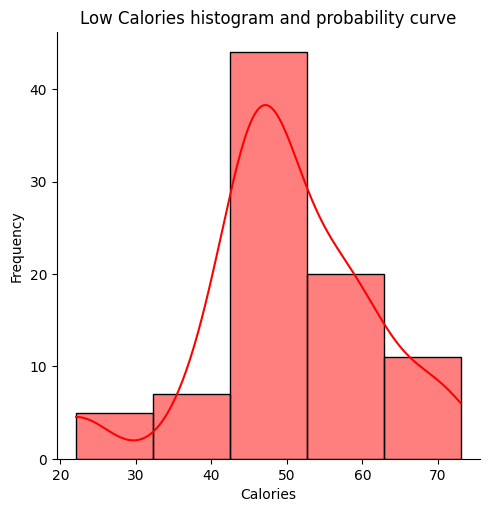

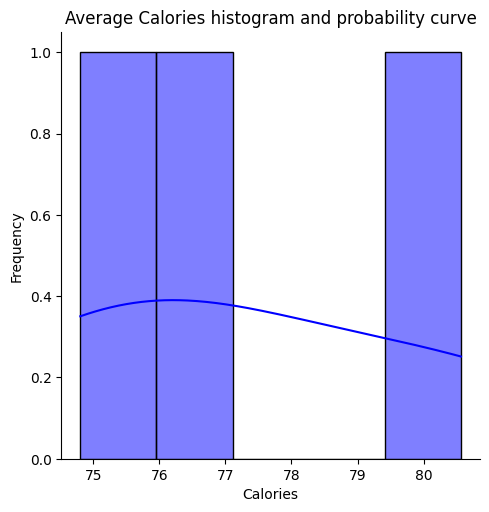

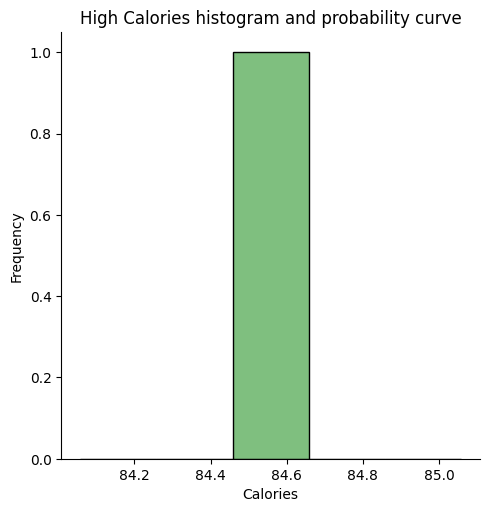

In [13]:
def plot_data_hist():

    sb.displot(df_cal_low['Calories'], color="red", bins=5, kde=True) # bins is optional (it are class intervals) print "probability curve"
    plt.title("Low Calories histogram and probability curve")
    plt.ylabel("Frequency")
    plt.xlabel("Calories")
    plt.show()

    sb.displot(df_cal_average['Calories'], color="blue", bins=5, kde=True)
    plt.title("Average Calories histogram and probability curve")
    plt.ylabel("Frequency")
    plt.xlabel("Calories")
    plt.show()

    sb.displot(df_cal_high['Calories'], color="green", bins=5, kde=True)
    plt.title("High Calories histogram and probability curve")
    plt.ylabel("Frequency")
    plt.xlabel("Calories")
    plt.show()

    # As we can see, the data is normality distributed thanks to the prev transformation (Actividad 10: transformaciones)
    
plot_data_hist()

In [14]:
def plot_data_box():
    df = pd.DataFrame({'Low calories': df_cal_low['Calories'], 'Average calories': df_cal_average['Calories'], 'High calories': df_cal_high['Calories']})
    fig = px.box(df, points="all")
    fig.show()

    # as we can see, the chart show us a really notable difference between the three groups

plot_data_box()

-   Verifica si hay igualdad de varianzas entre los grupos calóricos considerados. Recuerda que en Python deberás aplicar la prueba de hipótesis de Lavene, mientras que en R y Minitab® tienes las dos opciones disponibles (intervalos y prueba de hipótesis). Considera una confianza del 97%, es decir, un nivel de significancia (probabilidad de equivocarse) del 3%.


In [15]:
# As we can see both charts are different, let's see the confidence intervals for each group with 97% of confidence.
def individual_interval_confidence_low():

    # df only can compare two groups, so let's try with low and high  calories
    low_high_df = pd.DataFrame({'Low calories': df_cal_low['Calories'], 'High calories': df_cal_high['Calories']})

    pd.set_option('display.max_rows', None)
    display(low_high_df)
    display(low_high_df.shape)
    
    print(st.t.interval(
        alpha=0.97, 
        df=len(df_cal_low) - 1,
        loc=np.mean(df_cal_low),
        scale=st.sem(df_cal_low)))

individual_interval_confidence_low()


,Low calories,High calories
0,61.3375,NaN
1,56.5156,NaN
2,60.6808,NaN
3,56.6705,NaN
4,57.6466,NaN
5,73.0291,NaN
6,67.3755,NaN
7,60.8057,NaN
8,59.7983,NaN
9,62.9359,NaN


(88, 2)

(array([ 47.50207798,   7.3190325 ,   3.0400845 , 237.43696344]), array([ 52.71202776,   7.92142727,   3.34883504, 292.46729863]))


In [17]:
# Let's see the different between groups

def group_interval_confidence():
    cal_low = df_cal_low['Calories']
    cal_high = df_cal_high['Calories']

    ic = pg.ttest(cal_low, cal_high, paired=False, confidence=0.97)
    print(ic.columns)
    print(ic['CI97%'])

group_interval_confidence()

# la diferencia esta entre -47.928899213157294 y menos -25.858796865274062, signfiica que el promedio de bajas y altas es nagavito quiere decir que el promedio de bajas es mas chico que el de altas y por lo tanto consumo más calorias bajas que altas


AssertionError: The T-value must be a int or a float.

In [18]:
def variances():
    # H0: equal variances
    # Ha: distinct variances

    stat, p_value = st.levene(df_cal_low['Calories'], df_cal_high['Calories'])
    
    # decision criteria: if p-value >= alpha, we accept H0 (equal variances), but if p-value < alpha, we reject H0 (distinct variances)

    print(f"stat: {stat}", f"p-value: {p_value}", sep='\n')

    print(0.24004694677109795 > 0.03)

    # * Por lo tanto, ambos grupos son iguales y hay comida similar en ambos grupos, ya que como más o menos lomismo en ambos grupos

variances()

stat: 1.0690164770880306
p-value: 0.3040664525867355
True


¿Cómo son las muestras, independientes o dependientes? Recuerda que esto es importante de determinar para que en el argumento correspondiente en Python, R o Minitab® lo declares como PAIRED = TRUE o PAIRED = FALSE. 

***R* = Si son independientes por si solas, las latas son altas y las bajas bajas.**


2. Interpreta los resultados de cada uno de los intervalos en el contexto del problema. En otras palabras responde si, en efecto, consumes más de un grupo calórico que de otro. Si esto es así, identifica qué tipo de alimentos están asociados a ese grupo, por ejemplo, comida grasosa como tacos, quesadillas, etc.

***R* = Al parecer después de realizar todo el tratamiento a los datos, puedo concluir que como más comida con calorías bajas, que comida con calorías altas. En cuanto  al grupo de calorías bajas puedo dientificar comida más "normal" por así decirlo, me refiero a quesadillas, sandwich, entre más y uno que ora comida grasosa.**

3. Compara el nivel promedio de carbohidratos entre dos grupos calóricos mediante un contraste de hipótesis usando el riesgo de equivocarme α=0.1. ¿Cuáles son tus conclusiones? ¿Llevas una dieta sana?

***R* = esa diferencia pasa por el cero por lo tanto son iguales, por lo tanto esambos grupos en promedio consumo los mismas carbohidratos en calorías.**

In [19]:
def comparison():
    # from df_cal_low get the calories column and carbohydrates column
    df_carbs_low = df_cal_low[['Calories', 'Carbohydrates']]
    print("df_carbs_low: ")
    display(df_carbs_low)
    display(df_carbs_low.shape)

    df_carbs_high = df_cal_high[['Calories', 'Carbohydrates']]
    print("df_carbs_high: ")
    display(df_carbs_high)
    display(df_carbs_high.shape)

    # use ttest to compare the two groups
    ic = pg.ttest(df_carbs_low['Carbohydrates'], df_carbs_high['Carbohydrates'], paired=False, confidence=0.99)
    print(ic.columns)
    print(ic['CI99%'])

comparison()

df_carbs_low: 


,Calories,Carbohydrates
0,61.3375,8.0656
1,56.5156,8.2981
2,60.6808,8.1841
3,56.6705,8.8800
4,57.6466,7.6791
5,73.0291,8.3458
6,67.3755,8.5143
7,60.8057,8.1339
8,59.7983,12.7236
9,62.9359,8.6025


(87, 2)

df_carbs_high: 


,Calories,Carbohydrates
25,84.5577,10.6436


(1, 2)

AssertionError: The T-value must be a int or a float.

Investiga sobre los intervalos de confianza basados en el método Bootstrap. ¿Qué ventajas/desventajas tienen sobre los intervalos de confianza que requieren del supuesto de normalidad?

***R*** = Supongamos que tenemos una nueva medecina y queremos probar su efectividad, pero solamente tenemos una muestra limitada de 10 pacientes. Dónde a el 70% le funciona pero al 30% no. Esto puede deberse a diferntes factores, cómo alimnetación, estilo de vida o simplemnte que la medecina no es efectiva, de igual forma tenemos que sacarle la media a los datos, pero nuevamente el proeblema sería que no serían datos 100% validados, ahora, una opción sería replicar el experimento con varios grupos de prueba, pero esto sería muy costoso, tanto en tiempo cómo dinero, ¿qué podríamos hacer en este caso?, fácil, usar el método Bootstrap.

Suecede que de nuestros datos anteriores, aplicamos el "Sampling with replacement"  que consiste en agarrar datos random de la muestra original el mismo número de veces que de datos tengamos (se permiten duplicados) y obtenemos una nueva muestra de 10 pacientes, en este caso, entre 7 pacientes que la medecina les funcionó y 3 que no. Esto es lo que se conoce como "Bootstrap sample" o "Bootstrap dataset". Reobtenemos la media para este nuevo grupo y repetimos este proceso muchas veces, para obtener una distribución de la medecina (para almacenarlo en un nuevo grupo y representarlo en un histrograma o las pruebas de analisis permitenentes) y así poder estimar su efectividad.

Básicamente, consiste en estos 4 pasos:
1. Hacer un boostrap dataset de la muestra original.
2. Calcular algo de la muestra original.
3. Registrar el cálculo.
4. Repetir los pasos 1-3 muchas veces con muestras deridabas de la original (usualmente se computariza con 10k veces para estimar la mejor distribución).

**Ventajas:**
* ***Normalización***: Te va armando la distribución de la muestra original normalizandola de alguna forma (después de suficiente veces).
* ***Flexibilidad***: Podemos registrar la media, el error estandar u otra estadistica.

**Desventajas:**
* ***Gasto computacional***: Si la muestra es grande, puede ser tardado tener una distribución apropiada.
* ***La muestra tiene que ser buena***: Si la muestra original no es acertada, es decir, que no represente al menos decentemente la problación total, el método no podrá hacer mucho.
